## AS5001 (SUPA-AAA) Advanced (Astronomical) Data Analysis

## Problem Set 1, due 9 am Mon 3 Oct 2022

In [1]:
# Enable inline plotting in notebook
%matplotlib inline
# Populate namespace with numerical python function library and matplotlib plotting library.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format',  '{:.4f}'.format)

# Problem 1. Histogram and Cumulative Distributions of Random Variables [25]

(a) Be encouraged to build up a toolkit of function definitions (subroutines) that you can then use again and again in different contexts. Write a function to generate a random number distributed uniformly between specified limits A and B. Document the inputs and outputs of each subroutine. For example, in Python your function RANU might start with comments as follows:

In [2]:
def ranu(a, b, iseed):
    """
    Return on each call a new random number sampling
    a uniform distribution between limits A and B,
    and a new value of the seed integer ISEED.

    Args:
        a (float): lower limit of boxcar
        b (float): upper limit of boxcar
        iseed (int): seed integer used for the random number generator

    Returns:
        res (float): a uniform random number
        nextseed (int): seed to be used on the next call
    """
    np.random.seed(iseed)
    norm_ranu = np.random.uniform()
    res = a + (b - a) * norm_ranu
    nextseed = int(norm_ranu * 1000000)
    return res, nextseed

def draw_ranu_sample(lower, upper, size, seed=10000):
    sample = np.zeros(size)
    for n in range(size):
        sample[n], seed = ranu(lower, upper, seed)
    return sample

Note: This should be very easy because you can use the numpy random number generator, e.g.
np.random.uniform, or equivalent, to obtain random numbers distributed uniformly between 0 and 1, and 
np.random.seed to set the random number generator seed.

Use RANU to generate 10 random numbers uniformly distributed between -10 and +10. Print those
10 values. Now use RANU a second time to re-generate the same sequence of random numbers and
print them to show that they are the same as the first sequence.

In [3]:
print("first time:")
seed = 10000
for n in range(10):
    num, seed = ranu(-10, 10, seed)
    print(num)

print("\nsecond time:")
seed = 10000
for n in range(10):
    num, seed = ranu(-10, 10, seed)
    print(num)

first time:
0.9094030206702541
-8.796928323082295
-0.2356116254446956
-5.323643773866518
-8.256449871180669
-1.1242722874816469
1.4205775271396686
3.8212120280712085
-2.650686919535654
6.0487357839321305

second time:
0.9094030206702541
-8.796928323082295
-0.2356116254446956
-5.323643773866518
-8.256449871180669
-1.1242722874816469
1.4205775271396686
3.8212120280712085
-2.650686919535654
6.0487357839321305


(b) Plot the binned histogram and cumulative (staircase) distribution function for $N$ samples drawn from your uniform random number generator RANU. The staircase should step up at each of the $N$ values, not just at the histgram bin boundaries, so that the finite bin size of your histogram does not degrade the resolution of your cumulative distribution. Make plots for $N = 10; 100; 1000; 10^4$.

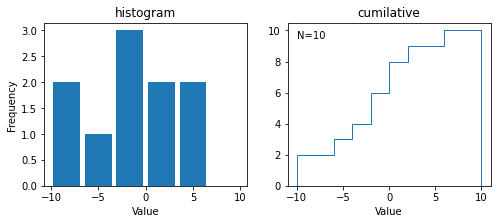

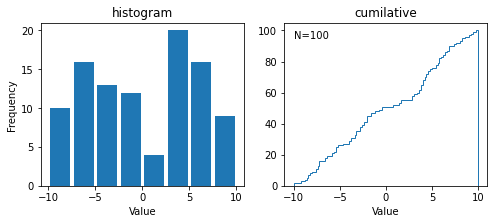

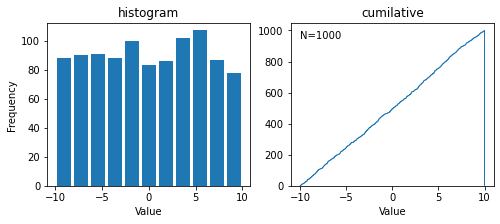

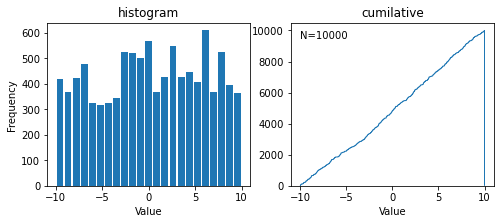

In [4]:
N_nums = [10, 100, 1000, 10000]

def plot_uniform_sample(size):
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    plt.hist(x=draw_ranu_sample(-10, 10, size), 
        range=[-10,10], bins="auto", rwidth=0.85)
    plt.title("histogram")
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.subplot(122)
    plt.hist(x=draw_ranu_sample(-10, 10, size), 
        range=[-10,10], bins=size, rwidth=0.85, 
        histtype='step', cumulative=True)
    plt.title("cumilative")
    plt.xlabel('Value')
    plt.text(-10, size*0.95, f"N={size}")
    plt.show()

for N in N_nums:
    plot_uniform_sample(N)

(c) Write similar functions  rang(avg,sig,iseed) for Gaussian and rane(tau,iseed)
for Exponential random numbers. These should transform values from ranu into samples
from the Gaussian and Exponential distributions. Make plots as in (b) for $N = 10^4$.

In [5]:
def rang(avg, sig, iseed):
    """
    Return on each call a new random number sampling
    a Gaussian distribution with avg and sig,
    and a new value of the seed integer ISEED.

    Args:
        avg (float): mean value of Gaussian
        sig (float): standard deviation of Gaussian
        iseed (int): seed integer used for the random number generator

    Returns:
        res (float): a Gaussian random number
        nextseed (int): seed to be used on the next call
    """
    np.random.seed(iseed)
    res = np.random.normal(avg, sig)
    nextseed = int(abs(res)*100000)
    return res, nextseed

def rane(tau, iseed):
    """
    Return on each call a new random number sampling
    an exponential distribution with scale parameter tau,
    and a new value of the seed integer ISEED.

    Args:
        tau (float): 
        iseed (int): seed integer used for the random number generator

    Returns:
        res (float): an exponential random number
        nextseed (int): seed to be used on the next call
    """
    np.random.seed(iseed)
    res = np.random.exponential(tau)
    nextseed = int(str(res)[3:8])
    return res, nextseed

def draw_rang_sample(avg, sig, size, seed=100):
    sample_g = np.zeros(size)
    for n in range(size):
        sample_g[n], seed = rang(avg, sig, seed)
    return sample_g

def draw_rane_sample(tau, size, seed=100):
    sample_e = np.zeros(size)
    for n in range(size):
        sample_e[n], seed = rane(tau, seed)
    return sample_e  

Gaussian sample


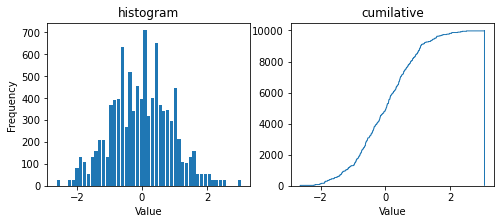

exponential sample


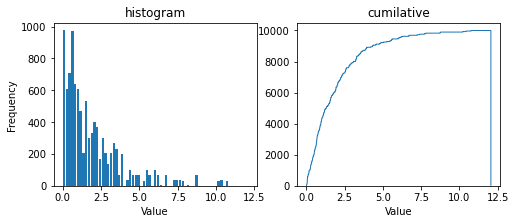

In [6]:
def plot_gaussian_sample(size):
    print("Gaussian sample")
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    plt.hist(x=draw_rang_sample(0, 1, size=size), 
        bins="auto", rwidth=0.85)
    plt.title("histogram")
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.subplot(122)
    plt.hist(x=draw_rang_sample(0, 1, size=size), 
        bins=size, rwidth=0.85, histtype='step', 
        cumulative=True)
    plt.title("cumilative")
    plt.xlabel('Value')
    plt.show()

def plot_exponential_sample(size):
    print("exponential sample")
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    plt.hist(x=draw_rane_sample(2, size=size), 
        bins="auto", rwidth=0.85)
    plt.title("histogram")
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.subplot(122)
    plt.hist(x=draw_rane_sample(2, size=size), 
        bins=size, rwidth=0.85, histtype='step', 
        cumulative=True)
    plt.title("cumilative")
    plt.xlabel('Value')
    plt.show()

plot_gaussian_sample(10000)
plot_exponential_sample(10000)

### Problem 2. Mean and Variance, Median and MAD [25]

(a) Write a function that computes the the sample mean and sample variance of an input array of data values. Take care to ensure that the sample variance is an unbiased estimator. As always, describe the input and output arguments of the surbroutine in comments at the top.

In [7]:
def meanvar(arr):
    """
    Compute sample mean and sample variance of data array X

    Args:
        arr (1darray[float]): array of data values

    Returns:
        avg (float): sample mean of data values
        var (float): sample variance of the data
    """
    n = len(arr)
    avg = sum(arr)/n
    var = sum([(x - avg)**2 for x in arr]) / (n-1)
    return avg, var

(b) Write a function to compute the median, and the mean-absolute-deviation (MAD) of an array of
data. Note: To compute the median, sort the data values, find the value half-way through the sorted
list, and interpolate if needed.

In [8]:
def medmad(arr):
    """
    Compute median and mean-absolute-deviation of data array

    Args:
        arr (1darray[float]): array of data values

    Returns:
        xmed (float): median of data values
        xmad (float): mean-absolute deviation (relative to median)
    """
    n = len(arr)
    arr.sort()
    xmed = ((arr[n//2-1] + arr[n//2])/2, arr[n//2])[n % 2]
    xmad = sum([abs(x - xmed) for x in arr]) / n
    return xmed, xmad

Sanity-check MEANVAR and MEDMAD using e.g. (1,2,3) and (1,2,3,4) as input.

In [9]:
# examples
arr = np.array([1, 2, 3])
print("array 1:", arr)
print("numpy mean, variance:", (np.mean(arr), np.var(arr, ddof=1)))
print("my meanvar function:", meanvar(arr))
print("numpy median, MAD:", (np.median(arr), np.mean(abs(arr - np.median(arr)))))
print("my medmad function:", medmad(arr))

arr2 = np.array([1, 2, 3, 4])
print("\narray 2:", arr2)
print("numpy mean, variance:", (np.mean(arr2), np.var(arr2, ddof=1)))
print("my meanvar function:", meanvar(arr2))
print("numpy median, MAD:", (np.median(arr2), np.mean(abs(arr2 - np.median(arr2)))))
print("my medmad function:", medmad(arr2))

array 1: [1 2 3]
numpy mean, variance: (2.0, 1.0)
my meanvar function: (2.0, 1.0)
numpy median, MAD: (2.0, 0.6666666666666666)
my medmad function: (2, 0.6666666666666666)

array 2: [1 2 3 4]
numpy mean, variance: (2.5, 1.6666666666666667)
my meanvar function: (2.5, 1.6666666666666667)
numpy median, MAD: (2.5, 1.0)
my medmad function: (2.5, 1.0)


(c) I'll supply a dataset from part of a zero-exposure CCD frame. Use your routines meanvar(x)
and medmad(x) to compute statistics that estimate the CCD bias level (mean and median) and the readout noise (standard deviation and mean-absolute-deviation). Summarise your results in a table, giving also a 1-$\sigma$ error bar for your sample mean, for the standard deviation, and (if possible) for the median.

In [10]:
datadir = './'
file = datadir+ 'bias.dat'
data = np.loadtxt(file,skiprows=6)
x,y,value = data[:,0],data[:,1],data[:,2]
xmean, xvariance = meanvar(value)
xmedian, xmad = medmad(value)
N = len(value)
errmean = np.sqrt(xvariance/N)
errmedian = np.sqrt(np.pi/2) * errmean
errstd = np.sqrt(xvariance/(2*N-2))
d = {("bias", "mean"): (xmean,errmean) , ("bias", "median"): (xmedian, errmedian),
    ("readout noise", "std"): (np.sqrt(xvariance), errstd), ("readout noise", "MAD"): (xmad, "")}
df = pd.DataFrame(d, index=["value", "error"])
display(df)

bias          readout noise       
          mean   median           std    MAD
value 796.1266 796.0000        3.3079 2.6065
error   0.0828   0.1038        0.0586

### Problem 3. Central Moments of a Distribution [25]

(a) Write a subroutine that computes statistics that estimate the mean, variance, and higher-order central moments of a dataset.

In [11]:
def moments(arr, m):
    """
    compute first M central moments of the data array.

    Args:
        x (float): array of data values
        m   (int): number of moments

    Return:  
        xmom[0]   (float): sample mean of data
        xmom[1]   (float): sample variance (unbiased for sigma^2)
        xmom[m-1] (float): m-th central moment, normalised to sigma^m) 
    """
    n = len(arr)
    xmom = np.zeros(m)
    xmom[0] = np.mean(arr)
    xmom[1] = np.var(arr, ddof=1)
    for order in range(3, m+1):
        xmom[order-1] = np.mean(((arr - np.mean(arr)) / np.std(arr))**order)
    return xmom

(b) Use ranu(a,b), rang($\mu,\sigma$) and rane($\tau$) (Problem 1) to generate $N=10^6$ random samples of Uniform, Gaussian, and Exponential distributions. Use moments(x,m) to compute the first 4 central moments in each case. Derive analytic formulae for the first 4 central moments in terms of the parameters of each distribution. (The required integrals are not too difficult. If you get stuck, for partal credit, try http://integrals.wolfram.com.) 
Prepare a table comparing your numerical and analytic results (test at least 2 sets of input parameters) to demonstrate the accuracy of your subroutines, and comment on reasons for any discrepancies.

In [12]:
# first set of parameters
size = 1000000
uniform_sample = draw_ranu_sample(-10, 10, size)
gaussian_sample = draw_rang_sample(0, 1, size)
exponential_sample = draw_rane_sample(5, size)

sample_moments = {
    ("uniform(-10,10)","numeric"): moments(uniform_sample, 4), 
    ("uniform(-10,10)","analytic"): [0., 33.3333, 0., 1.8],
    ("gaussian(0,1)","numeric"):moments(gaussian_sample, 4),
    ("gaussian(0,1)","analytic"): [0., 1., 0., 3.],
    ("exponential(5)","numeric"):moments(exponential_sample, 4),
    ("exponential(5)","analytic"): [5., 25., 2., 9.],
}

# second set of parameters
size = 1000000
uniform_sample = draw_ranu_sample(0, 5, size)
gaussian_sample = draw_rang_sample(5, 10, size)
exponential_sample = draw_rane_sample(2, size)

sample_moments[("uniform(0,5)", "numeric")] = moments(uniform_sample, 4)
sample_moments[("uniform(0,5)", "analytic")] = [2.5, 2.0833, 0., 1.8]
sample_moments[("gaussian(5,10)", "numeric")] = moments(gaussian_sample, 4)
sample_moments[("gaussian(5,10)", "analytic")] = [5., 100, 0., 3.]
sample_moments[("exponential(2)", "numeric")] = moments(exponential_sample, 4)
sample_moments[("exponential(2)", "analytic")] = [2., 4., 2., 9.]

df = pd.DataFrame(sample_moments, index=["1st", "2nd", "3rd", "4th"])
display(df)

uniform(-10,10)          gaussian(0,1)          exponential(5)           \
            numeric analytic       numeric analytic        numeric analytic   
1st          0.2780   0.0000       -0.0087   0.0000         5.4664   5.0000   
2nd         31.7293  33.3333        0.8634   1.0000        27.3850  25.0000   
3rd         -0.1043   0.0000        0.0770   0.0000         1.7950   2.0000   
4th          1.8847   1.8000        2.9528   3.0000         7.2123   9.0000   

    uniform(0,5)          gaussian(5,10)          exponential(2)           
         numeric analytic        numeric analytic        numeric analytic  
1st       2.5695   2.5000         5.3290   5.0000         1.9157   2.0000  
2nd       1.9831   2.0833       102.8910 100.0000         3.6901   4.0000  
3rd      -0.1043   0.0000        -0.0172   0.0000         1.8974   2.0000  
4th       1.8847   1.8000         3.0242   3.0000         7.2968   9.0000

Ans: The numerical results and analytical results generally match well. Discrepancy may arise from the finite sample size and non-randomness of the computer-generated random numbers. Derivation of analytical formula attached in a separated pdf.

### Problem 4. Monte-Carlo Simulation to compare Sample Means and Medians [25]

(a) The median $X_{\rm med}$ is a "robust" statistic, less sensitive
to large outliers than the sample mean $\overline{X}$.
For this reason, a "running median filter" is often used to "smooth" 
or remove "spikes" from a light curve or spectrum.
Medians are also often used to combine a series of CCD frames
so that the result is not badly affected by cosmic ray hits.
However, $X_{\rm med}$ is a noisier statistic than $\overline{X}$, as you will
discover in the following Monte-Carlo calculation.

Use your subroutine rang($\mu$,$\sigma$) to draw $N$ samples from a Gaussian distribution
with $(\mu,\sigma)=(0,1)$.
Calculate the sample mean $\overline{X}$ and median $X_{\rm med}$ for the set of $N$ samples.
Repeat the above calculation $M$ times,
and characterise the distributions of $X_{\rm med}$ and $\overline{X}$
by calculating their mean values and standard deviations over the $M$ 
samples. Choose $M$ large enough to keep uncertainties below
1% of the standard deviations.
Make a log-log plot showing from your Monte-Carlo simulation
how the standard deviations of $X_{\rm med}$ and $\overline{X}$
vary with $N$ for $N=1,2,3,...,100$.
(If this calculation takes a very long time, try to improve the efficiency of your code.)
Which statistic has the larger variance, $X_{\rm med}$ or $\overline{X}$?
Based on your results, decide whether it is better to take medians
with an odd or even number of data points.  Explain your reasoning.

(b) For a sample of $N$ Gaussian random variables 
(each with mean 0 and standard deviation $\sigma$),
derive an analytic formula in terms of $N$ and $\sigma$
for $\sigma^2(\overline{X})$, the variance of the sample mean.
Derive a similar formula for $\sigma^2(X_{\rm med})$, in the limit of large $N$.
Which is larger, $\sigma^2(\overline{X})$ or $\sigma^2(X_{\rm med})$?
Compare your formulae with the large-$N$ results 
from your Monte-Carlo simulation.

(a)

Experiment result for M=1000, N=100:


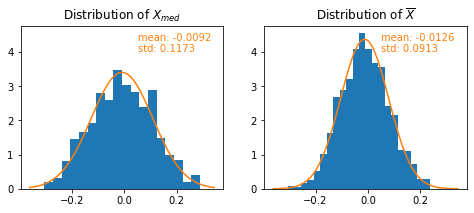

In [13]:
# Visualize one experiment
M=1000
data_points = {"medians":np.zeros(M), "means":np.zeros(M)}
for time in range(M):
    N=100
    sample = draw_rang_sample(0, 1, N, seed=time*100)
    data_points["medians"][time] = np.median(sample)
    data_points["means"][time] = np.mean(sample)

mu_med, sigma_med = np.mean(data_points["medians"]), np.std(data_points["medians"])
mu_mean, sigma_mean = np.mean(data_points["means"]), np.std(data_points["means"])

x = np.linspace(mu_med - 3*sigma_med, mu_med + 3*sigma_med, 100)
plt.figure(figsize=(8,3))

ax1 = plt.subplot(121)
plt.hist(data_points["medians"], density=True, bins="auto")
plt.plot(x, stats.norm.pdf(x, mu_med, sigma_med))
plt.text(0.05,4, f"mean: {mu_med:.4f} \nstd: {sigma_med:.4f}", color="tab:orange")
plt.title("Distribution of $X_{med}$")

ax2 = plt.subplot(122, sharey=ax1)
plt.hist(data_points["means"], density=True, bins="auto")
plt.plot(x, stats.norm.pdf(x, mu_mean, sigma_mean))
plt.text(0.05,4, f"mean: {mu_mean:.4f} \nstd: {sigma_mean:.4f}", color="tab:orange")
plt.title("Distribution of $\overline{X}$")

print(f"Experiment result for M={M}, N={N}:")

In [14]:
# Make a log-log plot for N=1,2,3...100
M=1000
N=100
sigma_data_points = {"med": np.zeros(N), "mean": np.zeros(N)}
for i in range(N):
    data_points = {"medians":np.zeros(M), "means":np.zeros(M)}
    for time in range(M):
        sample = draw_rang_sample(0, 1, i+1, seed=time*100)
        data_points["medians"][time] = np.median(sample)
        data_points["means"][time] = np.mean(sample)

    sigma_data_points["med"][i] = np.std(data_points["medians"])
    sigma_data_points["mean"][i] = np.std(data_points["means"])

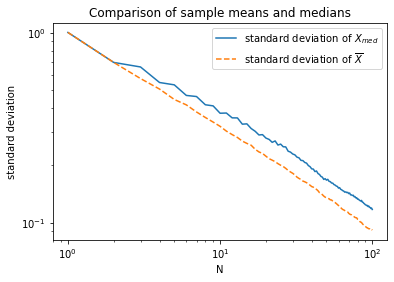

In [15]:
x = np.linspace(1, 100, 100)
plt.loglog(x, sigma_data_points["med"], label="standard deviation of $X_{med}$")
plt.loglog(x, sigma_data_points["mean"], "--", label="standard deviation of $\overline{X}$")
plt.legend()
plt.title("Comparison of sample means and medians")
plt.xlabel("N")
plt.ylabel("standard deviation")
plt.show()

Ans: $X_{med}$ has larger variance. It is better to take median with even number of samples, since this induces relatively less variance of the statistic.

(b) Derivation included in separate pdf.